## Paso 1: Carga del conjunto de datos

In [1]:
# Example importing the CSV here

import pandas as pd


dataframe = pd.read_csv('C:/Users/Jaime/Desktop/PROYECTOS DATA SCIENCE/Europe-s-Avalanches-18-22/data/european_avalanches_fatalities.csv')
dataframe.head()

,Unnamed: 0,Location,Country,Date,1oHazard,2oHazard,Dead,Party,Sport
0,0,Hohe Warte,Austria,2018-03-24,Persistent weak layer,NaN,1,10,Backcountry skiing
1,1,Hinterbergkofel,Austria,2018-03-18,Persistent weak layer,Wind slab,1,16,Backcountry skiing
2,2,Hochkarspitze,Austria,2018-02-21,Persistent weak layer,NaN,1,3,Backcountry skiing
3,3,Kals - Matreier Törl,Austria,2018-01-05,Wind slab,Persistent weak layer,2,2,Off-piste skiing
4,4,Velilltal,Austria,2018-01-04,Wind slab,New snow,1,3,Off-piste skiing


In [2]:
# Identificar el tipo de datos de cada columna
data_types = dataframe.dtypes

# Separar las columnas categóricas y numéricas
categorical_columns = list(data_types[data_types == 'object'].index)
numeric_columns = list(data_types[data_types != 'object'].index)

print(categorical_columns)
print(numeric_columns)

['Location', 'Country', 'Date', '1oHazard', '2oHazard', 'Sport']
['Unnamed: 0', 'Dead', 'Party']


## Paso 2: Realiza un EDA completo

In [3]:
# Obtener las dimensiones
dataframe.shape

(314, 9)

In [4]:
# Obtener información sobre tipos de datos y valores no nulos
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  314 non-null    int64 
 1   Location    305 non-null    object
 2   Country     312 non-null    object
 3   Date        314 non-null    object
 4   1oHazard    219 non-null    object
 5   2oHazard    143 non-null    object
 6   Dead        314 non-null    int64 
 7   Party       314 non-null    int64 
 8   Sport       265 non-null    object
dtypes: int64(3), object(6)
memory usage: 22.2+ KB


In [5]:
#Eliminar duplicados
if dataframe.duplicated().sum() > 0:
    dataframe = dataframe.drop_duplicates()

In [6]:
#comprobar q se han eliminado duplicados

dataframe.duplicated().sum()

0

In [7]:
#Eliminar información irrelevante
dataframe.drop(["Unnamed: 0"], axis = 1, inplace = True)
dataframe.head()

,Location,Country,Date,1oHazard,2oHazard,Dead,Party,Sport
0,Hohe Warte,Austria,2018-03-24,Persistent weak layer,NaN,1,10,Backcountry skiing
1,Hinterbergkofel,Austria,2018-03-18,Persistent weak layer,Wind slab,1,16,Backcountry skiing
2,Hochkarspitze,Austria,2018-02-21,Persistent weak layer,NaN,1,3,Backcountry skiing
3,Kals - Matreier Törl,Austria,2018-01-05,Wind slab,Persistent weak layer,2,2,Off-piste skiing
4,Velilltal,Austria,2018-01-04,Wind slab,New snow,1,3,Off-piste skiing


In [8]:
# Drop rows with missing values in the "Country" column
dataframe = dataframe.dropna(subset=['Country'])

# Filter the dataframe based on the "Country" column containing the word "Andorra"
filtered_dataframe = dataframe[dataframe['Country'].str.contains('Spain', case=False)]

# Print the filtered dataframe
filtered_dataframe

,Location,Country,Date,1oHazard,2oHazard,Dead,Party,Sport
28,Val d\\\'Aran,Spain,2018-03-22,Wind slab,NaN,2,3,Backcountry skiing
29,Formigal,Spain,2018-02-28,NaN,NaN,1,0,Off-piste skiing
71,Val d\\\'Aran,Spain,2019-01-26,Wind slab,Persistent weak layer,1,0,Off-piste skiing
117,Cap de Vaquèira,Spain,2020-03-03,Wind slab,New snow,1,4,Off-piste skiing
171,San Isidro,Spain,2021-01-01,NaN,NaN,2,3,Travelling on road
250,Roques Blanques-Pic de la Dona,Spain,2021-11-28,Wind slab,NaN,1,1,Mountaineering/Climbing
286,Cap de Vaquèira,Spain,2022-04-04,Wind slab,NaN,1,2,Off-piste skiing


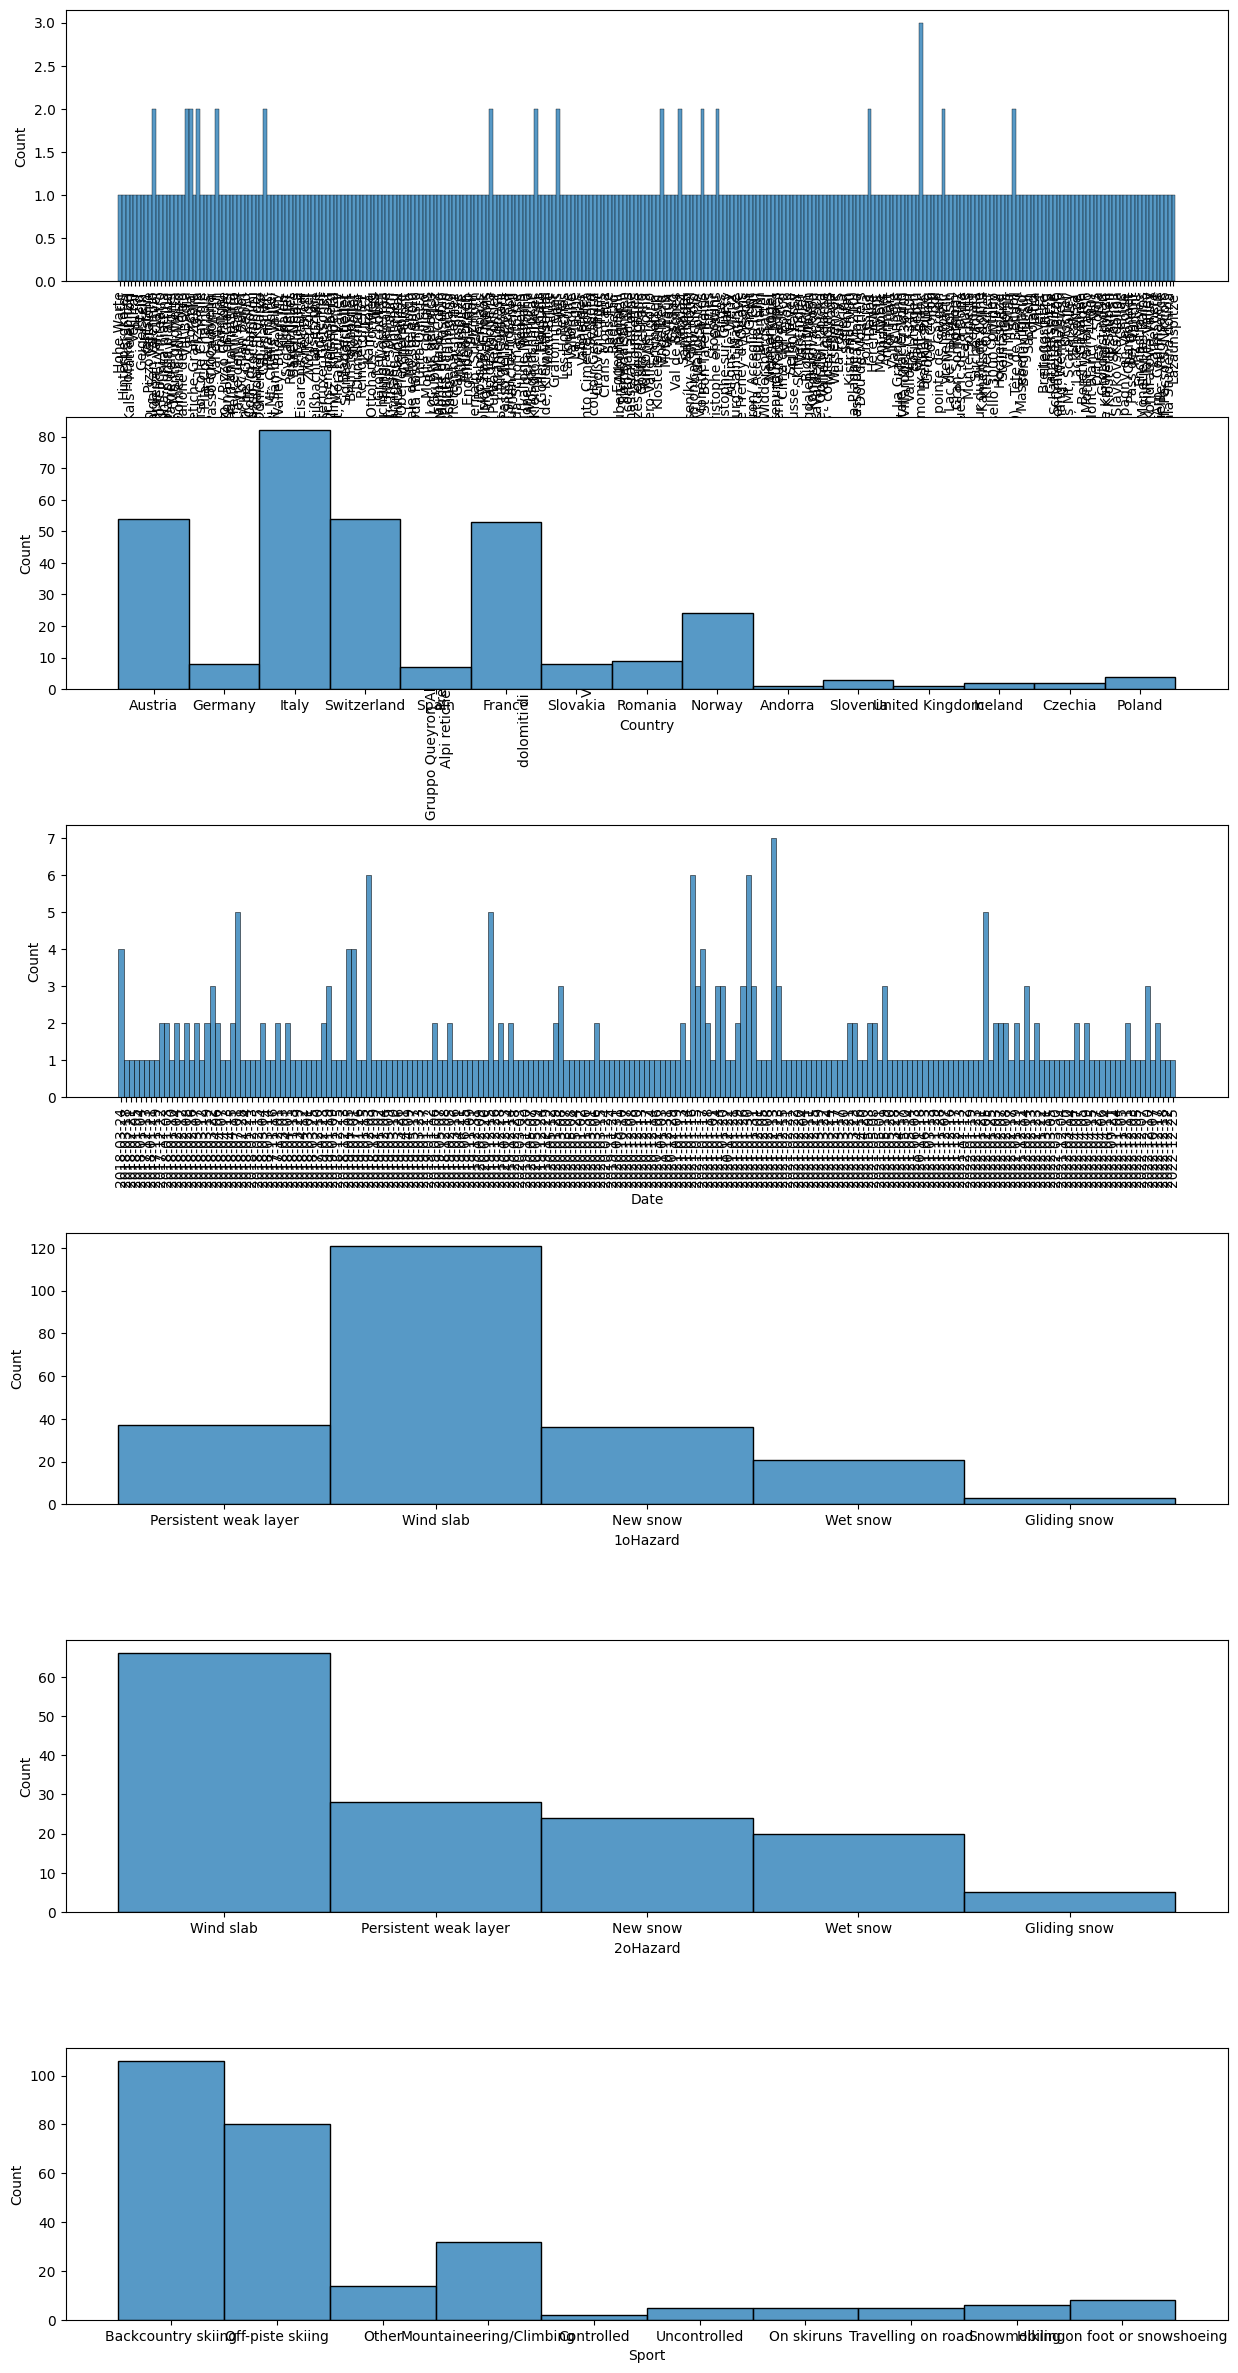

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear lienzo del gráfico
fig, axes = plt.subplots(6, 1, figsize=(15, 30))  # Increase the figure height to allow more space

# Crear histograma
sns.histplot(ax=axes[0], data=dataframe, x='Location')
axes[0].tick_params(axis='x', rotation=90)
sns.histplot(ax=axes[1], data=dataframe, x='Country')
sns.histplot(ax=axes[2], data=dataframe, x='Date')
axes[2].tick_params(axis='x', rotation=90)
sns.histplot(ax=axes[3], data=dataframe, x='1oHazard')
sns.histplot(ax=axes[4], data=dataframe, x='2oHazard')
sns.histplot(ax=axes[5], data=dataframe, x='Sport')

# Ajustar espacio entre subplots
plt.subplots_adjust(hspace=0.5)  # Increase the value as needed to add more space between subplots

# Mostrar el gráfico
plt.show()


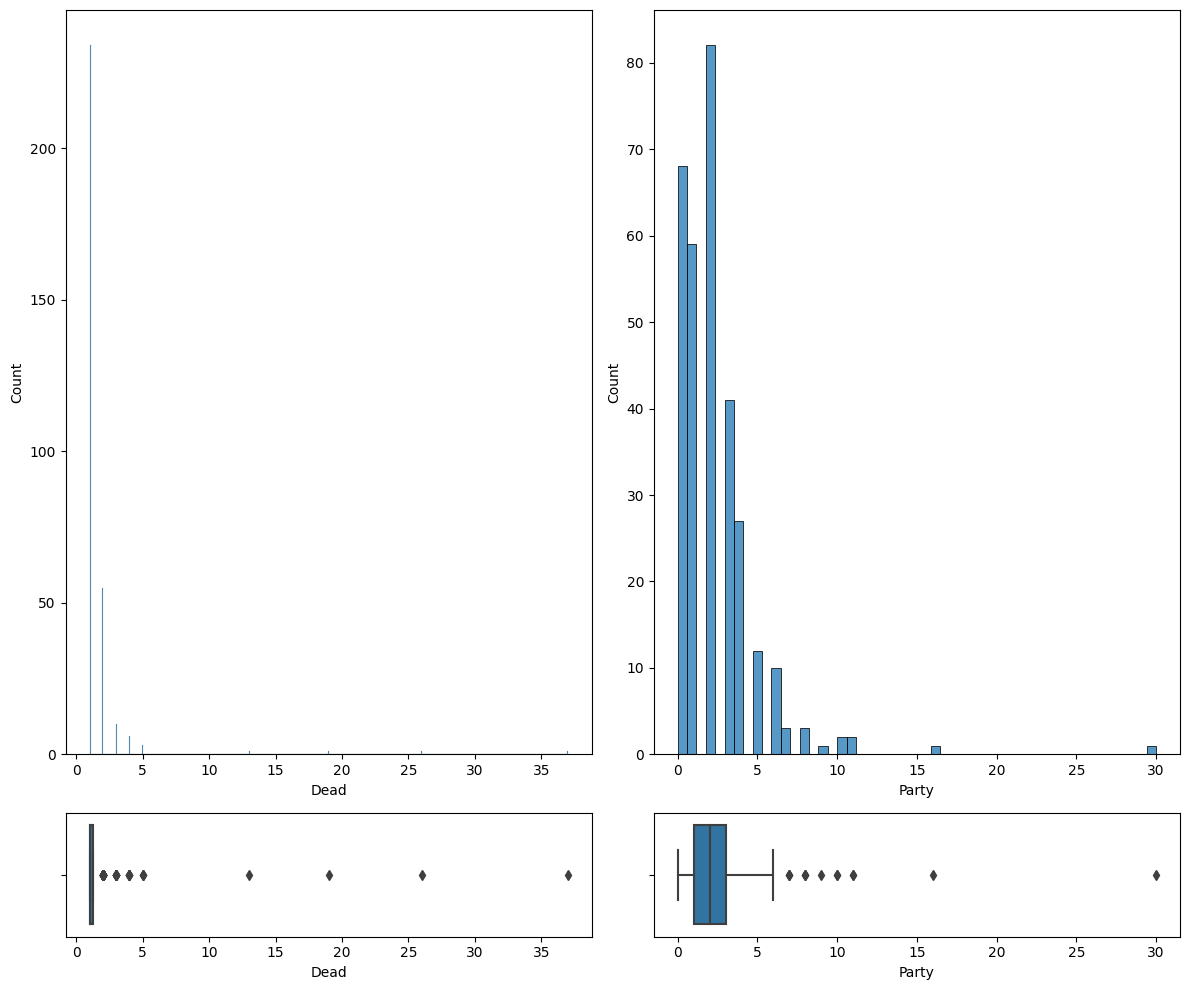

In [10]:
#analisis numerico

import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura de subplots con configuración de 2 filas y 2 columnas
fig, axis = plt.subplots(2, 2, figsize=(12, 10), gridspec_kw={'height_ratios': [6, 1]})

# Gráficos de la primera sección (variables 'Dead' y 'Party')
sns.histplot(ax=axis[0, 0], data=dataframe, x="Dead")
sns.boxplot(ax=axis[1, 0], data=dataframe, x="Dead")
sns.histplot(ax=axis[0, 1], data=dataframe, x="Party")
sns.boxplot(ax=axis[1, 1], data=dataframe, x="Party")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

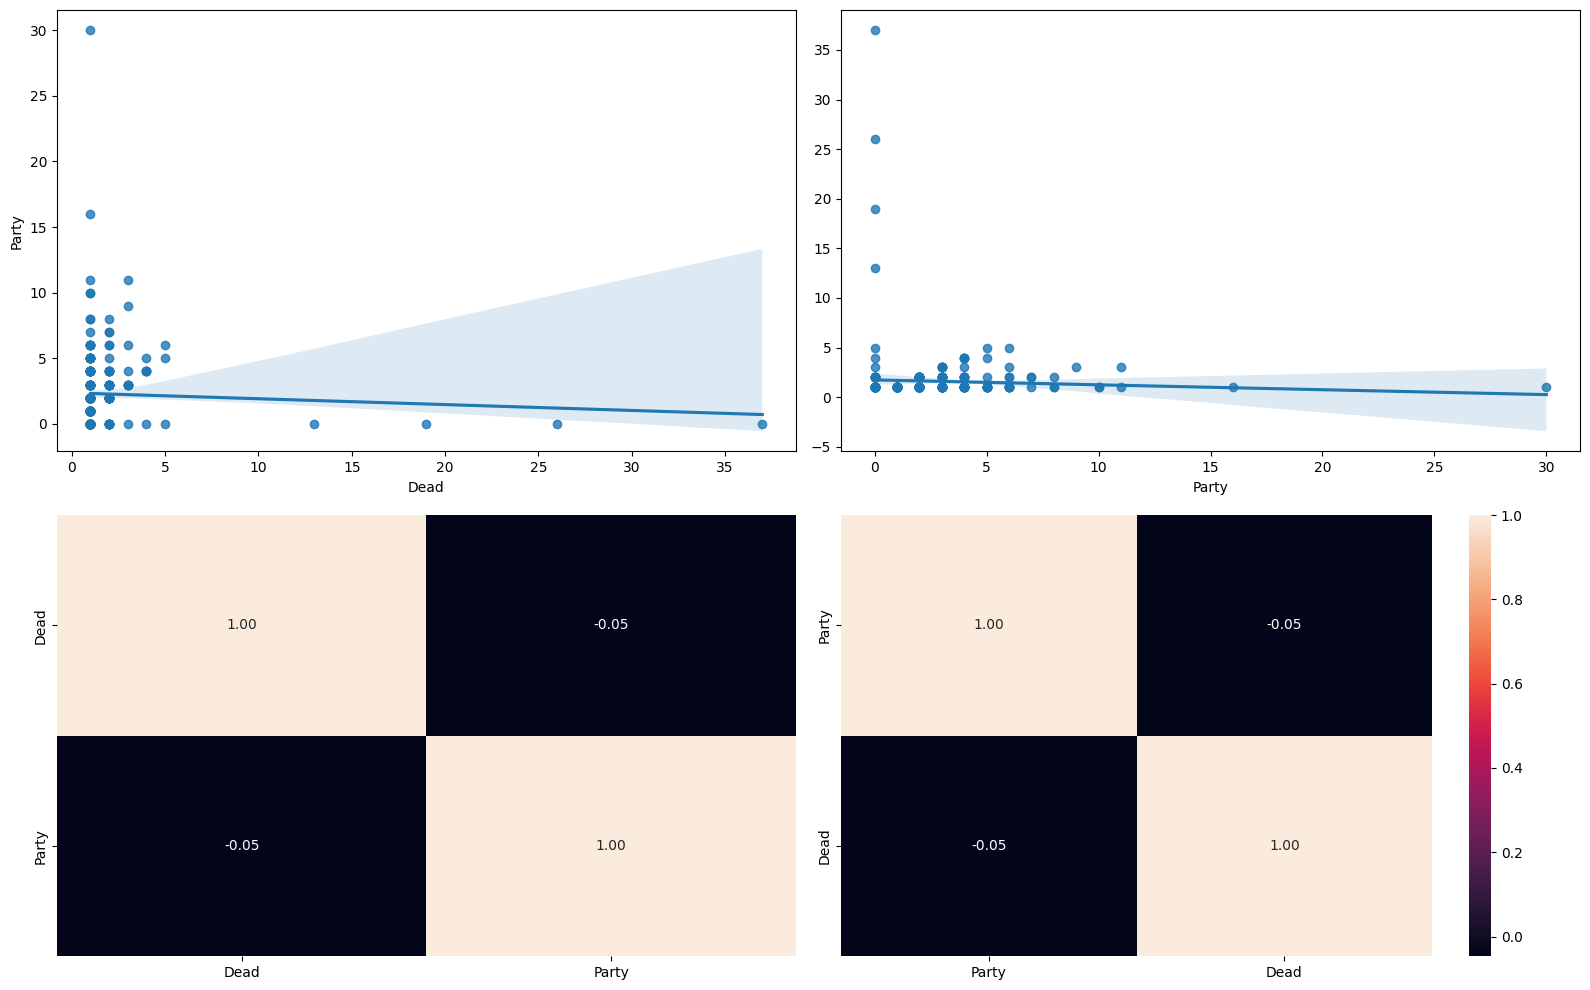

In [11]:
#Análisis numérico-numérico
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura de subplots con configuración de 2 filas y 2 columnas
fig, axis = plt.subplots(2, 2, figsize=(16, 10))

# Gráfico de dispersión y correlación entre "Dead" y "Party"
sns.regplot(ax=axis[0, 0], data=dataframe, x="Dead", y="Party")
sns.heatmap(dataframe[["Dead", "Party"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False)

# Gráfico de dispersión y correlación entre "Dead" y "Party"
sns.regplot(ax=axis[0, 1], data=dataframe, x="Party", y="Dead").set(ylabel=None)
sns.heatmap(dataframe[["Party", "Dead"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


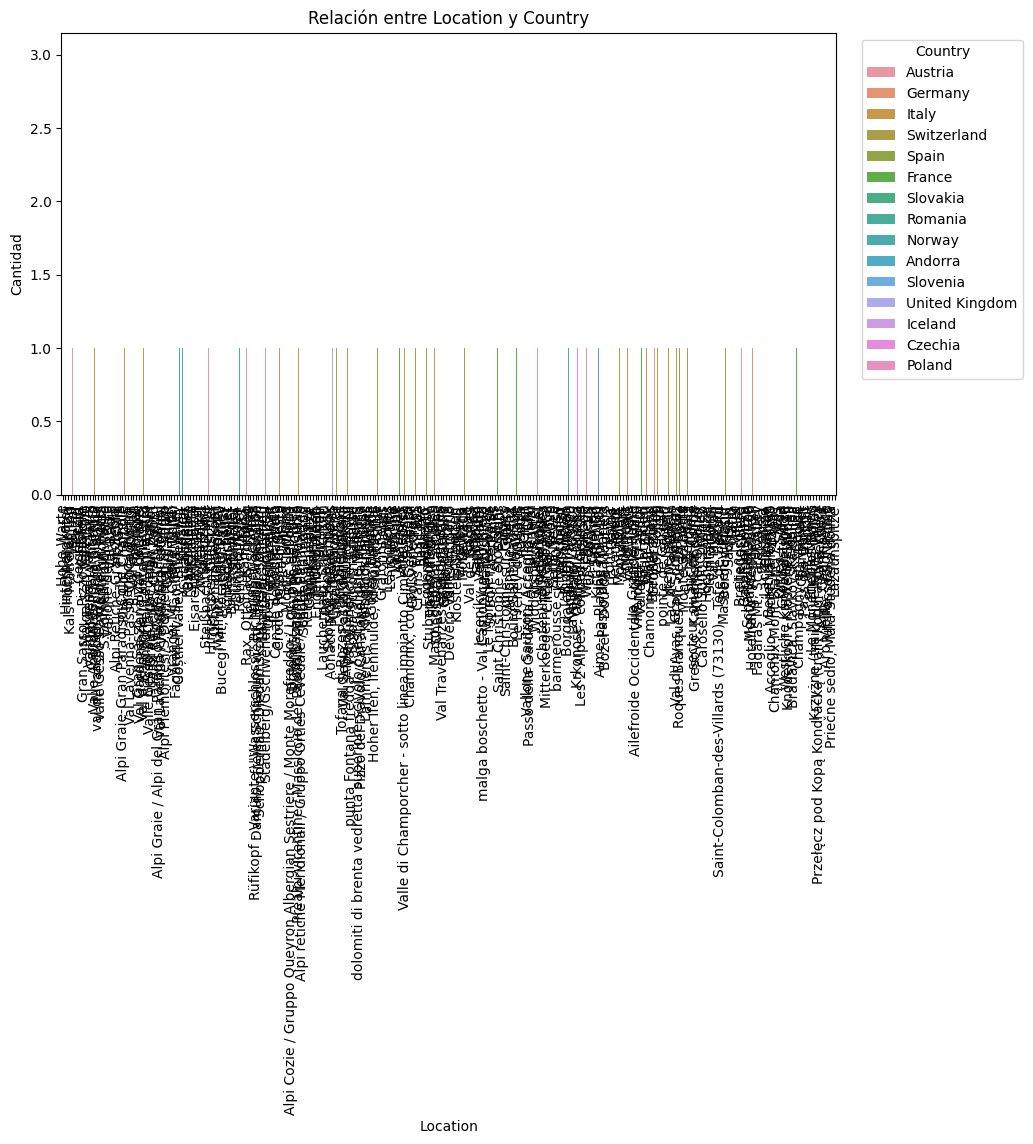

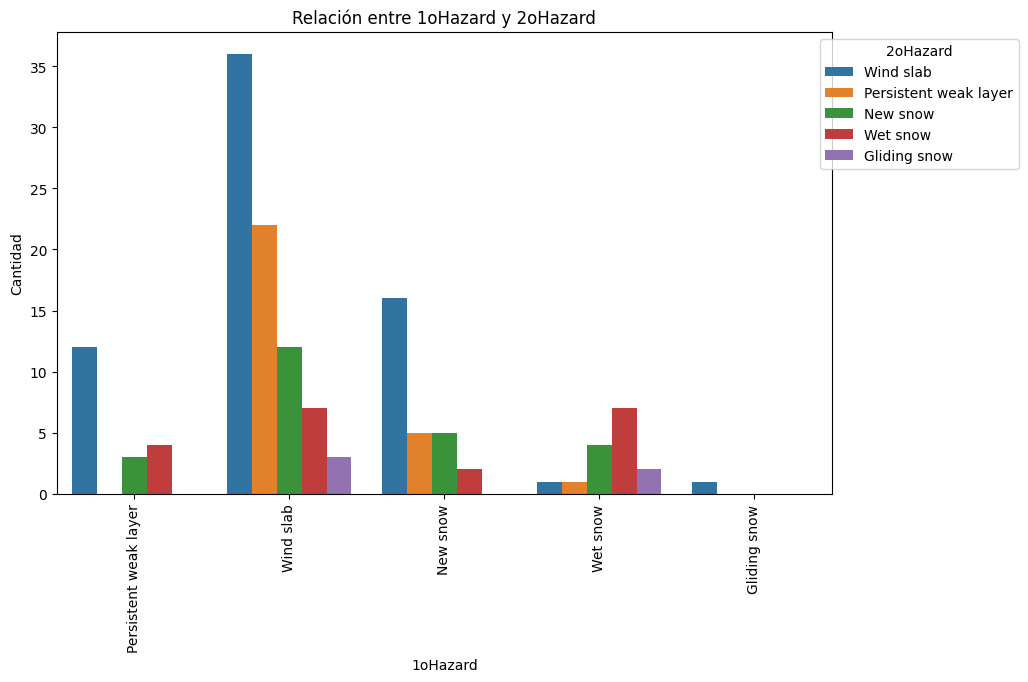

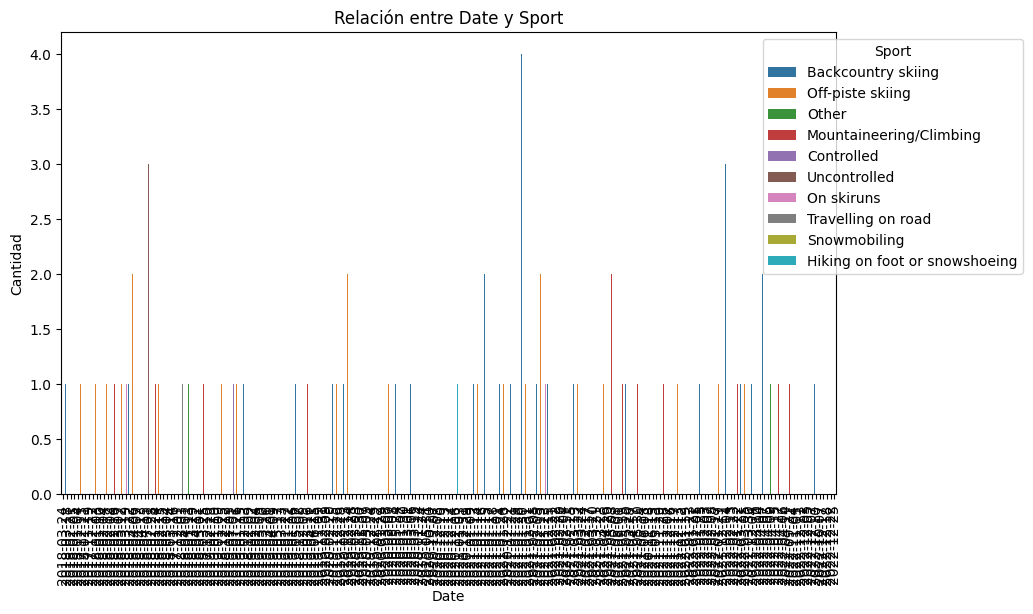

In [12]:
#Análisis categórico-categórico
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una tabla de contingencia entre las variables categóricas
contingency_table_location_country = pd.crosstab(dataframe['Location'], dataframe['Country'])
contingency_table_1oHazard_2oHazard = pd.crosstab(dataframe['1oHazard'], dataframe['2oHazard'])
contingency_table_date_sport = pd.crosstab(dataframe['Date'], dataframe['Sport'])

# Crear gráfico de barras apiladas para 'Location' y 'Country'
plt.figure(figsize=(10, 6))
sns.countplot(data=dataframe, x='Location', hue='Country')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejorar la legibilidad
plt.title("Relación entre Location y Country")
plt.xlabel("Location")
plt.ylabel("Cantidad")
plt.legend(title="Country", loc='upper right', bbox_to_anchor=(1.25, 1))

# Mostrar el gráfico
plt.show()

# Crear gráfico de barras apiladas para '1oHazard' y '2oHazard'
plt.figure(figsize=(10, 6))
sns.countplot(data=dataframe, x='1oHazard', hue='2oHazard')
plt.xticks(rotation=90)
plt.title("Relación entre 1oHazard y 2oHazard")
plt.xlabel("1oHazard")
plt.ylabel("Cantidad")
plt.legend(title="2oHazard", loc='upper right', bbox_to_anchor=(1.25, 1))

# Mostrar el gráfico
plt.show()

# Crear gráfico de barras apiladas para 'Date' y 'Sport'
plt.figure(figsize=(10, 6))
sns.countplot(data=dataframe, x='Date', hue='Sport')
plt.xticks(rotation=90)
plt.title("Relación entre Date y Sport")
plt.xlabel("Date")
plt.ylabel("Cantidad")
plt.legend(title="Sport", loc='upper right', bbox_to_anchor=(1.25, 1))

# Mostrar el gráfico
plt.show()


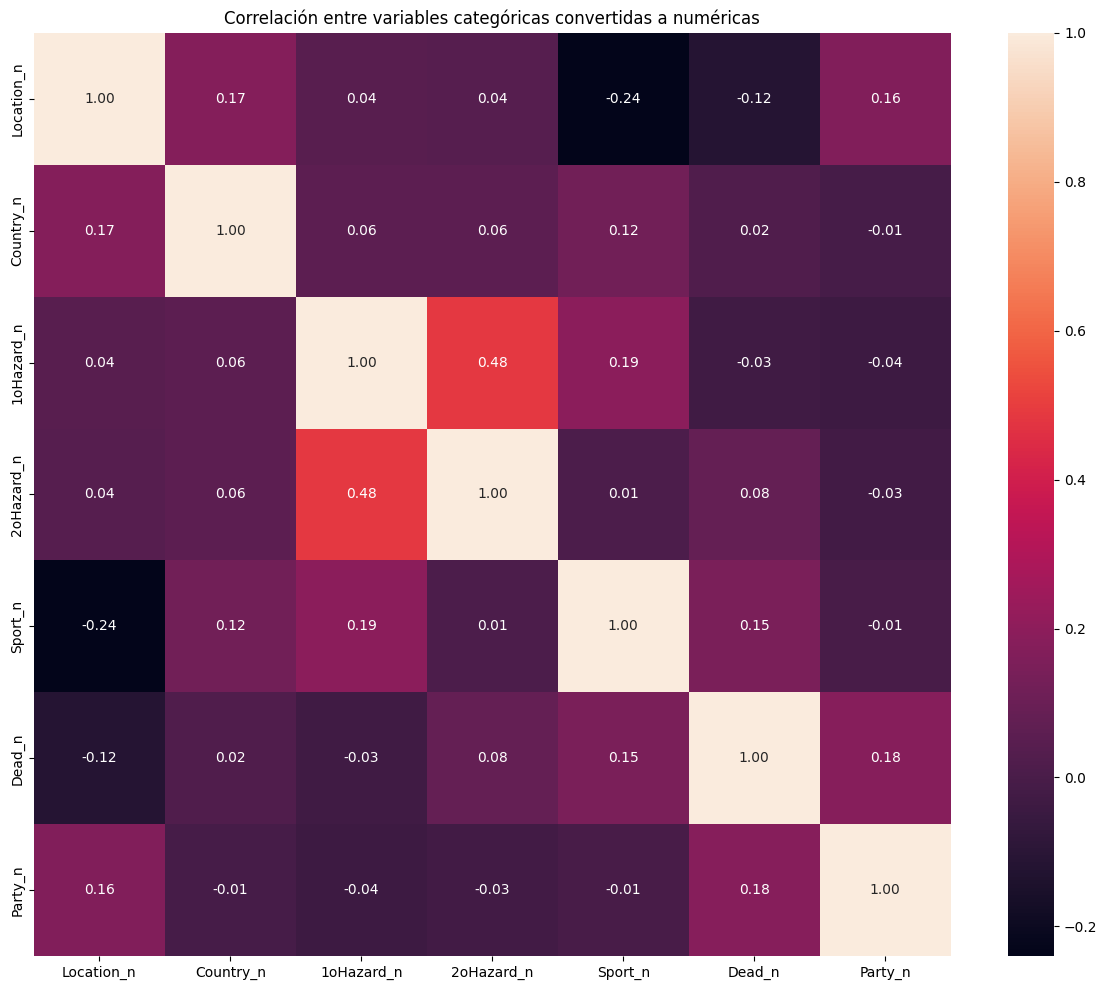

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a copy of the DataFrame to avoid the SettingWithCopyWarning
dataframe_copy = dataframe.copy()

# Factorize categorical columns
dataframe_copy['Location_n'] = pd.factorize(dataframe_copy['Location'])[0]
dataframe_copy['Country_n'] = pd.factorize(dataframe_copy['Country'])[0]
dataframe_copy['1oHazard_n'] = pd.factorize(dataframe_copy['1oHazard'])[0]
dataframe_copy['2oHazard_n'] = pd.factorize(dataframe_copy['2oHazard'])[0]
dataframe_copy['Sport_n'] = pd.factorize(dataframe_copy['Sport'])[0]
dataframe_copy['Dead_n'] = pd.factorize(dataframe_copy['Dead'])[0]
dataframe_copy['Party_n'] = pd.factorize(dataframe_copy['Party'])[0]

# Plot the correlation heatmap
fig, axis = plt.subplots(figsize=(12, 10))
sns.heatmap(dataframe_copy[['Location_n', 'Country_n', '1oHazard_n', '2oHazard_n', 'Sport_n', 'Dead_n', 'Party_n']].corr(), annot=True, fmt=".2f")
plt.title("Correlación entre variables categóricas convertidas a numéricas")
plt.tight_layout()
plt.show()



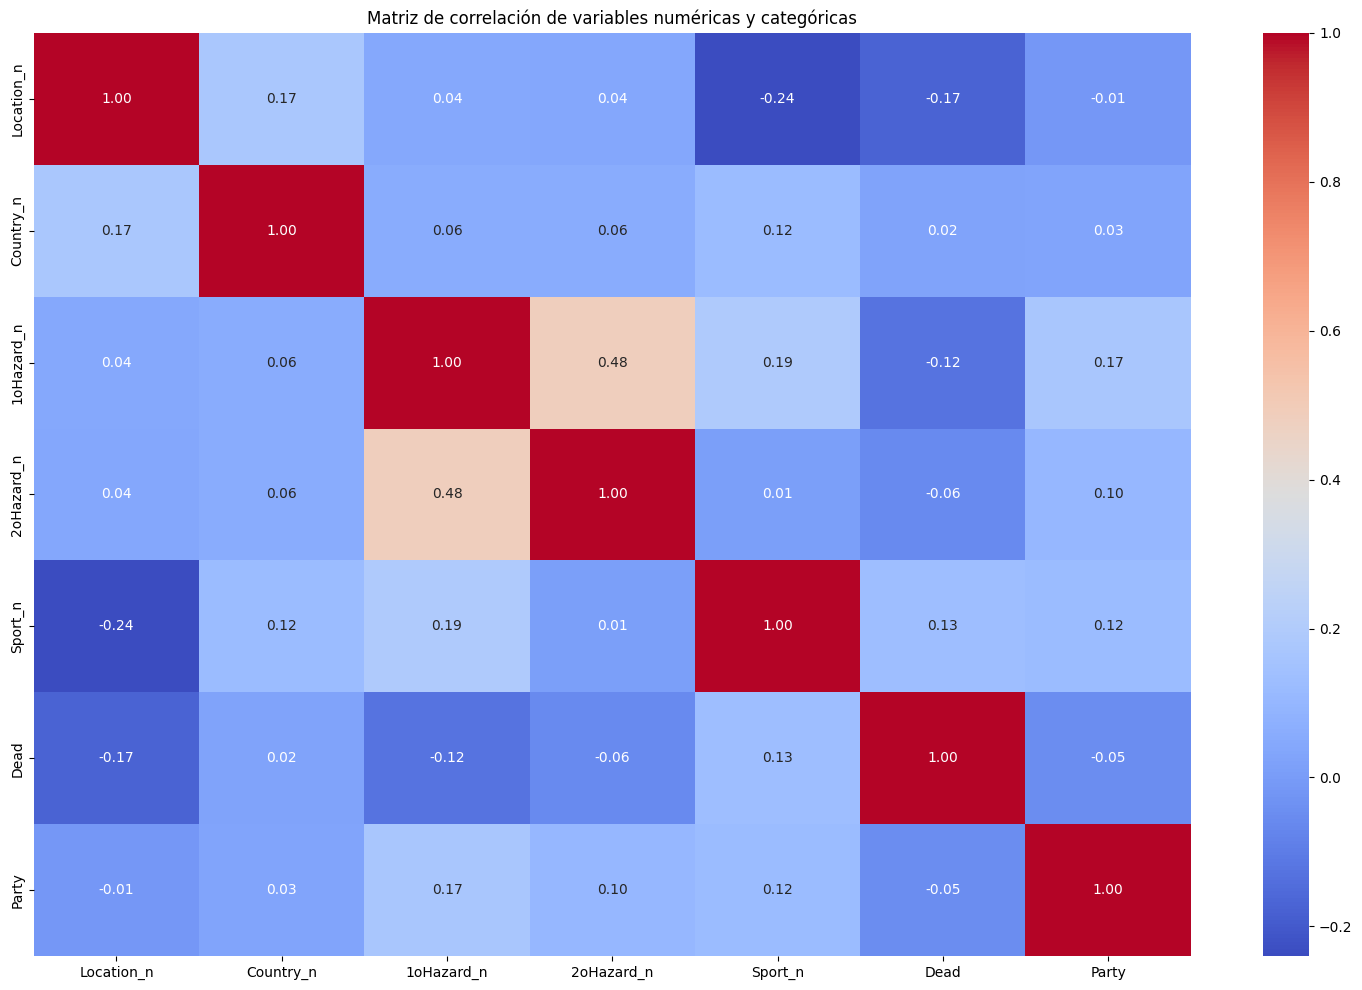

In [14]:
#heatmap

import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las columnas numéricas y categóricas para el análisis
numeric_columns = ["Dead", "Party"]
categorical_columns = ["Location", "Country", "Date", "1oHazard", "2oHazard", "Sport"]

# Calcular la matriz de correlación entre las variables numéricas
corr_matrix_numeric = dataframe[numeric_columns].corr()

# Calcular la matriz de correlación entre las variables categóricas
corr_matrix_categorical = dataframe[categorical_columns].apply(lambda x: pd.factorize(x)[0]).corr()

# Unir ambas matrices de correlación
corr_matrix_combined = pd.concat([corr_matrix_numeric, corr_matrix_categorical], axis=1)

# Create a copy of the DataFrame to avoid the SettingWithCopyWarning
dataframe_copy = dataframe.copy()

# Convert categorical columns to numerical using factorize
dataframe_copy['Location_n'] = pd.factorize(dataframe_copy['Location'])[0]
dataframe_copy['Country_n'] = pd.factorize(dataframe_copy['Country'])[0]
dataframe_copy['1oHazard_n'] = pd.factorize(dataframe_copy['1oHazard'])[0]
dataframe_copy['2oHazard_n'] = pd.factorize(dataframe_copy['2oHazard'])[0]
dataframe_copy['Sport_n'] = pd.factorize(dataframe_copy['Sport'])[0]

# Plot the correlation heatmap for both numerical and categorical columns
plt.figure(figsize=(15, 10))
sns.heatmap(dataframe_copy[['Location_n', 'Country_n', '1oHazard_n', '2oHazard_n', 'Sport_n'] + numeric_columns].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlación de variables numéricas y categóricas")
plt.tight_layout()
plt.show()


C:\Users\Jaime\AppData\Local\Temp\ipykernel_10528\769417901.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


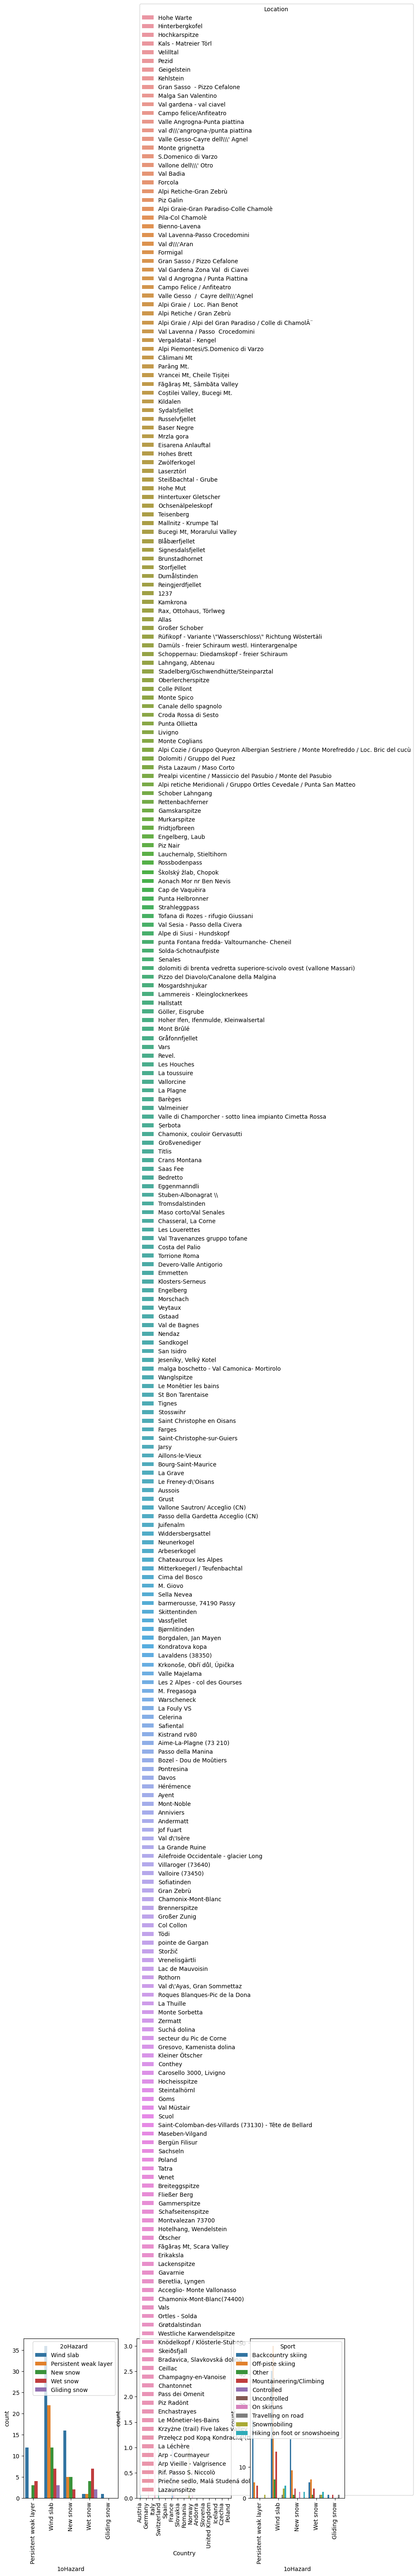

In [15]:
#Analizamos las variables mas altas

fig, axis = plt.subplots(figsize=(10, 5), ncols=3)

sns.countplot(ax=axis[0], data=dataframe, x="1oHazard", hue="2oHazard")
axis[0].tick_params(axis='x', rotation=90)
sns.countplot(ax=axis[1], data=dataframe, x="Country", hue="Location")
axis[1].tick_params(axis='x', rotation=90)
sns.countplot(ax=axis[2], data=dataframe, x="1oHazard", hue="Sport")
axis[2].tick_params(axis='x', rotation=90)


plt.tight_layout()
plt.show()


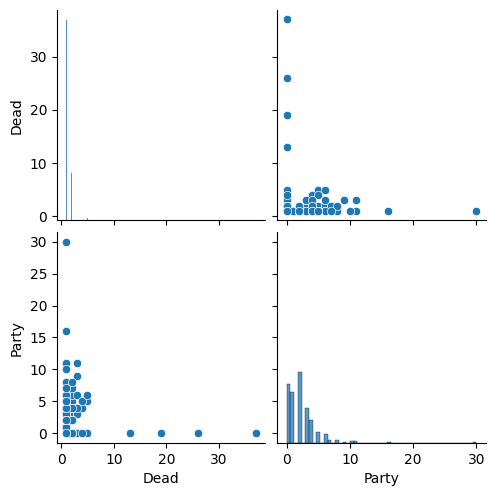

In [16]:
#dibujar el pairplot

sns.pairplot(data = dataframe)